In [17]:
import nibabel as nib
import os 
import matplotlib.pyplot as plt
import numpy as np 
import cv2

In [10]:
path = 'Data/'
files = os.listdir(path)

In [54]:
file = os.path.join(path, files[0])

raw = nib.load(file)

mri = raw.get_fdata()



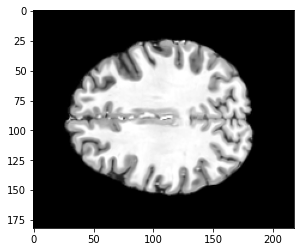

In [56]:
plt.imshow(mri[:,:,100], cmap='gray')

In [50]:
mri.max()

255.0

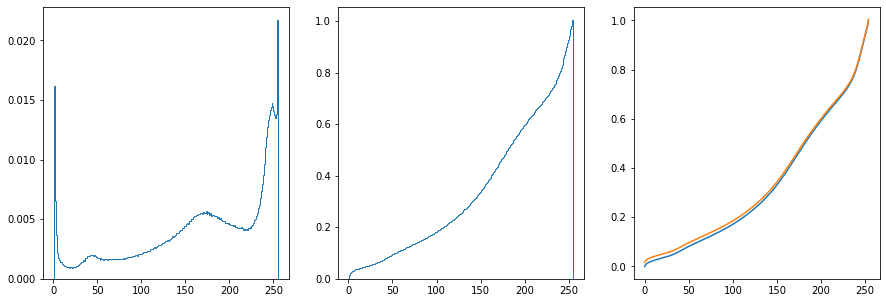

In [137]:
# plot histogram of intensities 
fig, axs = plt.subplots(1, 3, figsize=(15,5))
hist,  bin_edges = np.histogram(mri.ravel(),bins=255, range=(1,mri.max()), density = True)
axs[0].stairs(hist, bin_edges)
F = np.cumsum(hist)

axs[1].stairs(F, bin_edges)

hist_norm = (F - F.min()) / (F.max()-F.min()) * 255
axs[2].plot(hist_norm/255)
axs[2].plot(F)


In [109]:
test = np.ma.filled(hist_norm,0).astype('uint8')

In [124]:
test = np.append(test, 255)

In [118]:
mri = mri.astype('uint8')

In [126]:
mri1 = test[mri]

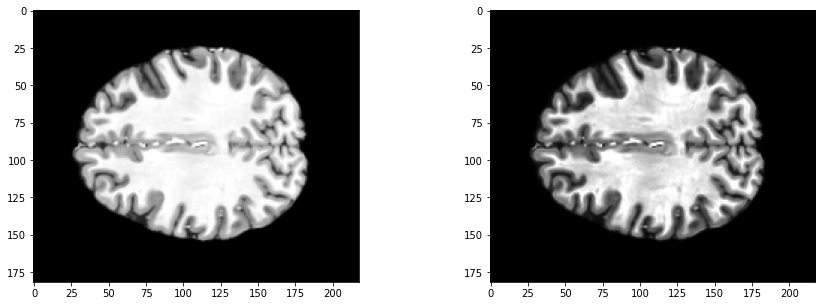

In [129]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(mri[:,:,100],cmap='gray')
ax[1].imshow(mri1[:,:,100],cmap='gray')

In [ ]:
# histogram matching 


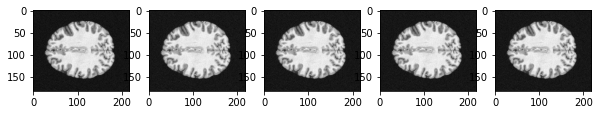

In [31]:
# add gaussian noise 

fix, axs = plt.subplots(1,5, figsize=(10,3))

sds = [5, 2, 1, 0.1, 0.01]

for i in range(5):
    mri = raw.get_fdata()
    mri += np.random.normal(0,sds[i],mri.shape)
    axs[i].imshow(mri[:,:,100], cmap='gray')



In [33]:
mri[:,:,100].min()

-26.668825831566163

In [34]:
mri[:,:,100].max()


275.04137819390604

In [35]:
dist = np.random.normal(0,sds[i],mri.shape)

In [36]:
print(dist.min(),  dist.max())

-0.05045522620615569 0.049765202200885095
